In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


In [4]:
# Load the cleaned data from the CSV file created in the data preparation script
hotel_data = pd.read_csv('cleaned_data.csv', parse_dates=["Date"], index_col="Date")

# Display the first few rows to verify the data has been loaded correctly
print(hotel_data.head())


            Arrivals  Occupied  OccPercent  RoomRev  RevPAR     ADR
Date                                                               
2022-10-01        40        67       90.54  7163.51   96.80  106.92
2022-10-02        23        29       38.67  2669.72   35.60   92.06
2022-10-03        22        25       34.67  2165.42   28.87   83.29
2022-10-04        23        33       43.42  2981.50   39.23   90.35
2022-10-05        29        40       52.63  3608.22   47.48   90.21


In [5]:
# Resample the data by month and calculate the average for the relevant metrics
monthly_trends = hotel_data.resample('M').mean()

# Display the monthly trends
print(monthly_trends)


             Arrivals   Occupied  OccPercent      RoomRev     RevPAR  \
Date                                                                   
2022-01-31  22.516129  34.935484   75.614516  2427.006774  52.374516   
2022-02-28  21.535714  36.607143   66.275357  2728.188929  49.004643   
2022-03-31  25.516129  45.161290   64.993871  3282.420968  47.040000   
2022-04-30  23.700000  40.200000   55.338000  3268.912667  44.770000   
2022-05-31  26.806452  41.677419   55.660968  3627.208387  48.326129   
2022-06-30  27.466667  37.533333   49.517333  3457.462667  45.493333   
2022-07-31  28.129032  43.516129   57.512581  3259.898065  42.893226   
2022-08-31  22.677419  34.258065   45.572258  2821.337742  37.457419   
2022-09-30  25.966667  34.266667   45.324000  3066.613000  40.508333   
2022-10-31  27.612903  40.612903   53.824516  4367.236452  57.832581   
2022-11-30  22.133333  31.866667   42.034667  2602.754333  34.303333   
2022-12-31  18.483871  25.580645   33.590968  2151.158710  28.24

In [6]:
# Define a function to categorize each month into a season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add a 'Season' column to the DataFrame
hotel_data['Season'] = hotel_data.index.to_series().apply(get_season)

# Group by season and calculate the average for the relevant metrics
seasonal_trends = hotel_data.groupby('Season').mean()

# Display the seasonal trends
print(seasonal_trends)


         Arrivals   Occupied  OccPercent      RoomRev     RevPAR        ADR
Season                                                                     
Fall    27.697802  43.642857   59.264066  3919.459176  53.095330  87.314066
Spring  25.927536  42.985507   58.873188  3583.423406  48.933623  81.139638
Summer  27.355140  44.976636   61.522009  3700.483832  50.491121  80.265234
Winter  23.866667  40.970833   61.580792  3263.826583  48.444083  78.618792


In [7]:
# Extract the month from the 'Date' column
hotel_data['Month'] = hotel_data.index.month

# Group by 'Season' and 'Month' to calculate average metrics for each month within each season
seasonal_monthly_analysis = hotel_data.groupby(['Season', 'Month']).mean()

# Display the results
print(seasonal_monthly_analysis)


               Arrivals   Occupied  OccPercent      RoomRev     RevPAR  \
Season Month                                                             
Fall   9      28.316667  44.166667   59.622667  3875.744667  52.183500   
       10     28.887097  46.822581   63.810806  4668.193548  63.444516   
       11     25.850000  39.833333   54.207167  3189.481500  43.313000   
Spring 3      25.731183  45.268817   62.395591  3653.286774  50.142903   
       4      25.322222  42.466667   57.716000  3625.677667  49.163333   
       5      26.709677  41.204301   56.470645  3472.668817  47.502043   
Summer 6      28.244444  45.922222   62.104222  3885.201111  52.341111   
       7      28.338710  47.064516   64.631452  3731.422419  51.200806   
       8      25.080645  41.516129   57.567419  3401.407258  47.095968   
Winter 1      24.419355  42.806452   68.067312  3394.601183  52.913226   
       2      23.811765  41.200000   61.311765  3291.724706  48.503647   
       12     23.112903  37.903226   5

/Users/amanpatel/Documents/Hospitality/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/amanpatel/Documents/Hospitality/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/amanpatel/Documents/Hospitality/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/amanpatel/Documents/Hospital

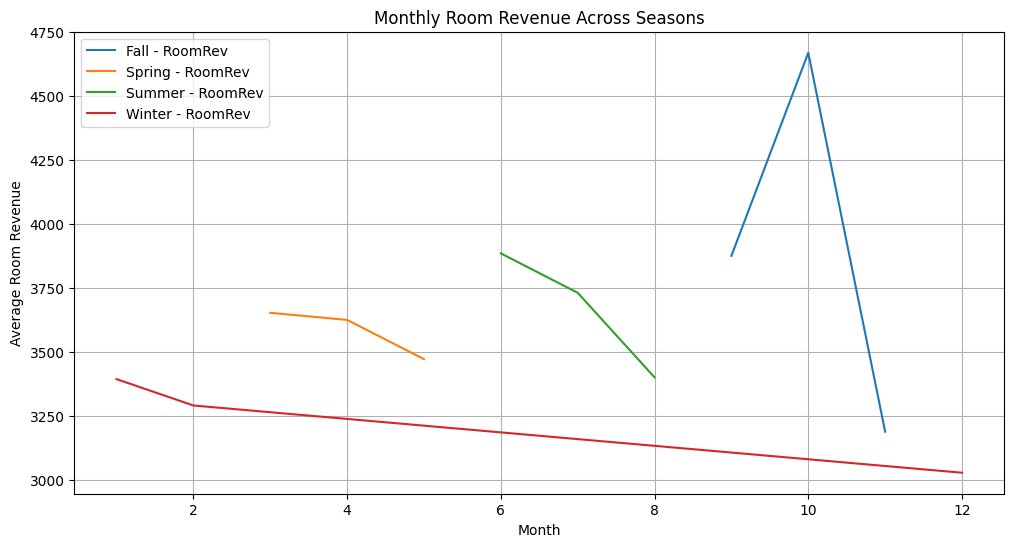

In [8]:
# Plotting Room Revenue by Month for each Season
plt.figure(figsize=(12, 6))
for season in seasonal_monthly_analysis.index.get_level_values('Season').unique():
    plt.plot(
        seasonal_monthly_analysis.loc[season].index, 
        seasonal_monthly_analysis.loc[season, 'RoomRev'], 
        label=f'{season} - RoomRev'
    )

plt.title('Monthly Room Revenue Across Seasons')
plt.xlabel('Month')
plt.ylabel('Average Room Revenue')
plt.legend()
plt.grid()
plt.show()
